# Poem: Logistic Regression

For this project, the text is the feature and the label is the date of the poem.

We use logistic regression for a multi-class text classification task (dates will be centuries).

# 🎓 Library

In [1]:
# Stopwords
import nltk
nltk.download("stopwords")


[nltk_data] Downloading package stopwords to /home/tofeha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [58]:
# Misc
import os
import numpy as np
import pandas as pd

# Training
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

# Plotting
import plotly.express as px
import seaborn as sns

DATA = "data/"

if not os.path.exists(DATA):
    raise FileNotFoundError(f"Data directory {DATA} does not exist. Please create it and add the data files.")

# Step 1: Loading

In [38]:
poems_df = pd.read_parquet(DATA + "de_poems.parquet")

Our feature is `text`, and the label is `creation`.

We encode only the features.

In [39]:
poems_df.head(3)["text"].values

array(['Gebohrn, und wiederumb, o Mensch, gebohren werden,\nErrettet dich vom Tod und hilfft dir in Beschwerden.',
       'Es suchte niemand Gott, liegt er gleich unterm Leben,\nWär er nicht Lieb und hätt es nicht mit Lieb umbgeben.',
       'Die ist in Gott, und Gott der ist zugleich in Ihr,\nIn der ich leb, und die auch wieder lebt in mir.'],
      dtype=object)

# Step 2: Preprocessing

In [40]:
# Transform all date to centuries, else we have 304 classes
poems_df["creation"] = poems_df["creation"].apply(lambda x: str(int(x)// 100 + 1))

In [42]:
german_stop_words = stopwords.words("german")

vectorizer = TfidfVectorizer(stop_words=german_stop_words)

x = vectorizer.fit_transform(poems_df["text"])
y = poems_df["creation"]

In [43]:
print(f"Currently have {len(poems_df)} poems with {len(y.unique())} dates.")
print(f"Model has {len(vectorizer.get_feature_names_out())} features.")

Currently have 71570 poems with 8 dates.
Model has 318755 features.


# Step 3: Data splitting and model training

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [45]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((57256, 318755), (14314, 318755), (57256,), (14314,))

In [47]:
model = LogisticRegression(random_state=42, solver="saga", verbose=10)
model.fit(x_train, y_train)

Epoch 1, change: 1
Epoch 2, change: 0.19421486
Epoch 3, change: 0.10467167
Epoch 4, change: 0.075075177
Epoch 5, change: 0.058647501
Epoch 6, change: 0.055215361
Epoch 7, change: 0.042972802
Epoch 8, change: 0.05270181
Epoch 9, change: 0.021299424
Epoch 10, change: 0.017443568
Epoch 11, change: 0.014926087
Epoch 12, change: 0.0072633494
Epoch 13, change: 0.0060204959
Epoch 14, change: 0.024257315
Epoch 15, change: 0.0046354611
Epoch 16, change: 0.0017191191
Epoch 17, change: 0.002065649
Epoch 18, change: 0.0012329928
Epoch 19, change: 0.00037783861
Epoch 20, change: 0.00027538684
Epoch 21, change: 0.00036008865
Epoch 22, change: 0.00025194716
convergence after 23 epochs took 5 seconds


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.3s


LogisticRegression(random_state=42, solver='saga', verbose=10)

# Step 4: Evaluation and finetuning

In [49]:
y_found = model.predict(x_test)

In [50]:
print(classification_report(y_test,y_found, zero_division=0))

              precision    recall  f1-score   support

          11       0.50      0.02      0.04        55
          13       0.00      0.00      0.00        18
          14       0.95      0.48      0.63       189
          16       0.99      0.69      0.81       210
          17       0.92      0.92      0.92      4032
          18       0.86      0.64      0.73      2880
          19       0.79      0.96      0.86      6476
          20       0.97      0.07      0.12       454

    accuracy                           0.84     14314
   macro avg       0.75      0.47      0.52     14314
weighted avg       0.85      0.84      0.82     14314



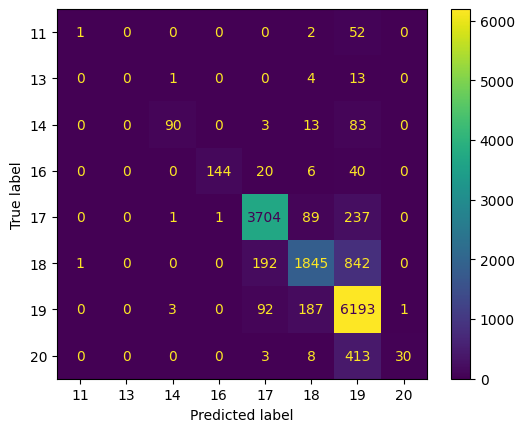

In [60]:
ConfusionMatrixDisplay.from_estimator(model, x_test, y_test)

In [61]:
# Compare the results with the actual y values
accuracy = accuracy_score(y_test, y_found)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.84
